In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno 
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
#read the data
df = pd.read_csv('/Users/danda/OneDrive/Desktop/Diabetes/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#get more info on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#describe the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Creating a new DataFrame `df_clean` with 0 values replaced by NaN for specific columns
df_clean = df.copy()
df_clean[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df_clean[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

# Displaying the first few rows of df_clean to confirm the replacement
df_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [6]:
#shows the sum of missing data for each collumn
df_clean.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:
# Calculating the percentage of missing values per column in df_clean
missing_percentage = df_clean.isnull().mean() * 100

# Formatting the result for better readability
missing_percentage = missing_percentage.reset_index()
missing_percentage.columns = ["Column", "Missing Percentage"]
missing_percentage

,Column,Missing Percentage
0,Pregnancies,0.000000
1,Glucose,0.651042
2,BloodPressure,4.557292
3,SkinThickness,29.557292
4,Insulin,48.697917
5,BMI,1.432292
6,DiabetesPedigreeFunction,0.000000
7,Age,0.000000
8,Outcome,0.000000


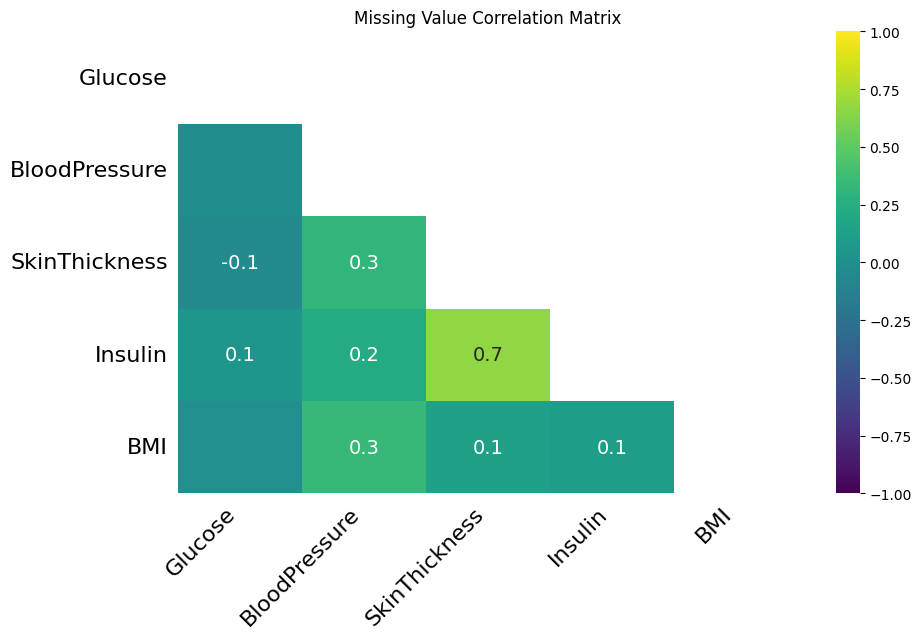

In [8]:
#visualizes the correlation of missing data
msno.heatmap(df_clean, figsize=(10, 6), cmap="viridis")
plt.title("Missing Value Correlation Matrix")
plt.show()

In [9]:
# Applying median imputation to selected columns using dictionary-based approach
columns_to_impute = ['Glucose', 'BloodPressure', 'BMI']
df_imputed = df_clean.copy()

# Creating a dictionary of median values for each column
median_values = {column: df_imputed[column].median() for column in columns_to_impute}
df_imputed.fillna(value=median_values, inplace=True)

# Displaying the first few rows of the dataset to verify imputation
df_imputed[columns_to_impute].head()

,Glucose,BloodPressure,BMI
0,148.0,72.0,33.6
1,85.0,66.0,26.6
2,183.0,64.0,23.3
3,89.0,66.0,28.1
4,137.0,40.0,43.1


In [10]:
df_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [11]:
# Creating a copy of df_imputed to perform MICE imputation
df_mice_imputed = df_imputed.copy()

# Selecting columns relevant for MICE imputation (including correlated columns)
columns_to_impute = ['SkinThickness', 'Insulin', 'Glucose', 'BloodPressure', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction']

# Initializing the MICE imputer (IterativeImputer) with default parameters
mice_imputer = IterativeImputer(max_iter=10, random_state=0)

# Applying MICE on the selected columns
df_mice_imputed[columns_to_impute] = mice_imputer.fit_transform(df_mice_imputed[columns_to_impute])

# Displaying the first few rows of the imputed DataFrame to verify changes
df_mice_imputed[['SkinThickness', 'Insulin']].head()

,SkinThickness,Insulin
0,35.000000,219.029355
1,29.000000,70.346930
2,21.518492,268.035207
3,23.000000,94.000000
4,35.000000,168.000000


In [12]:
df_mice_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,219.029355,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.000000,70.346930,26.6,0.351,31.0,0
2,8.0,183.0,64.0,21.518492,268.035207,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1


In [13]:
#checks to see how many missing values there are
df_mice_imputed.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

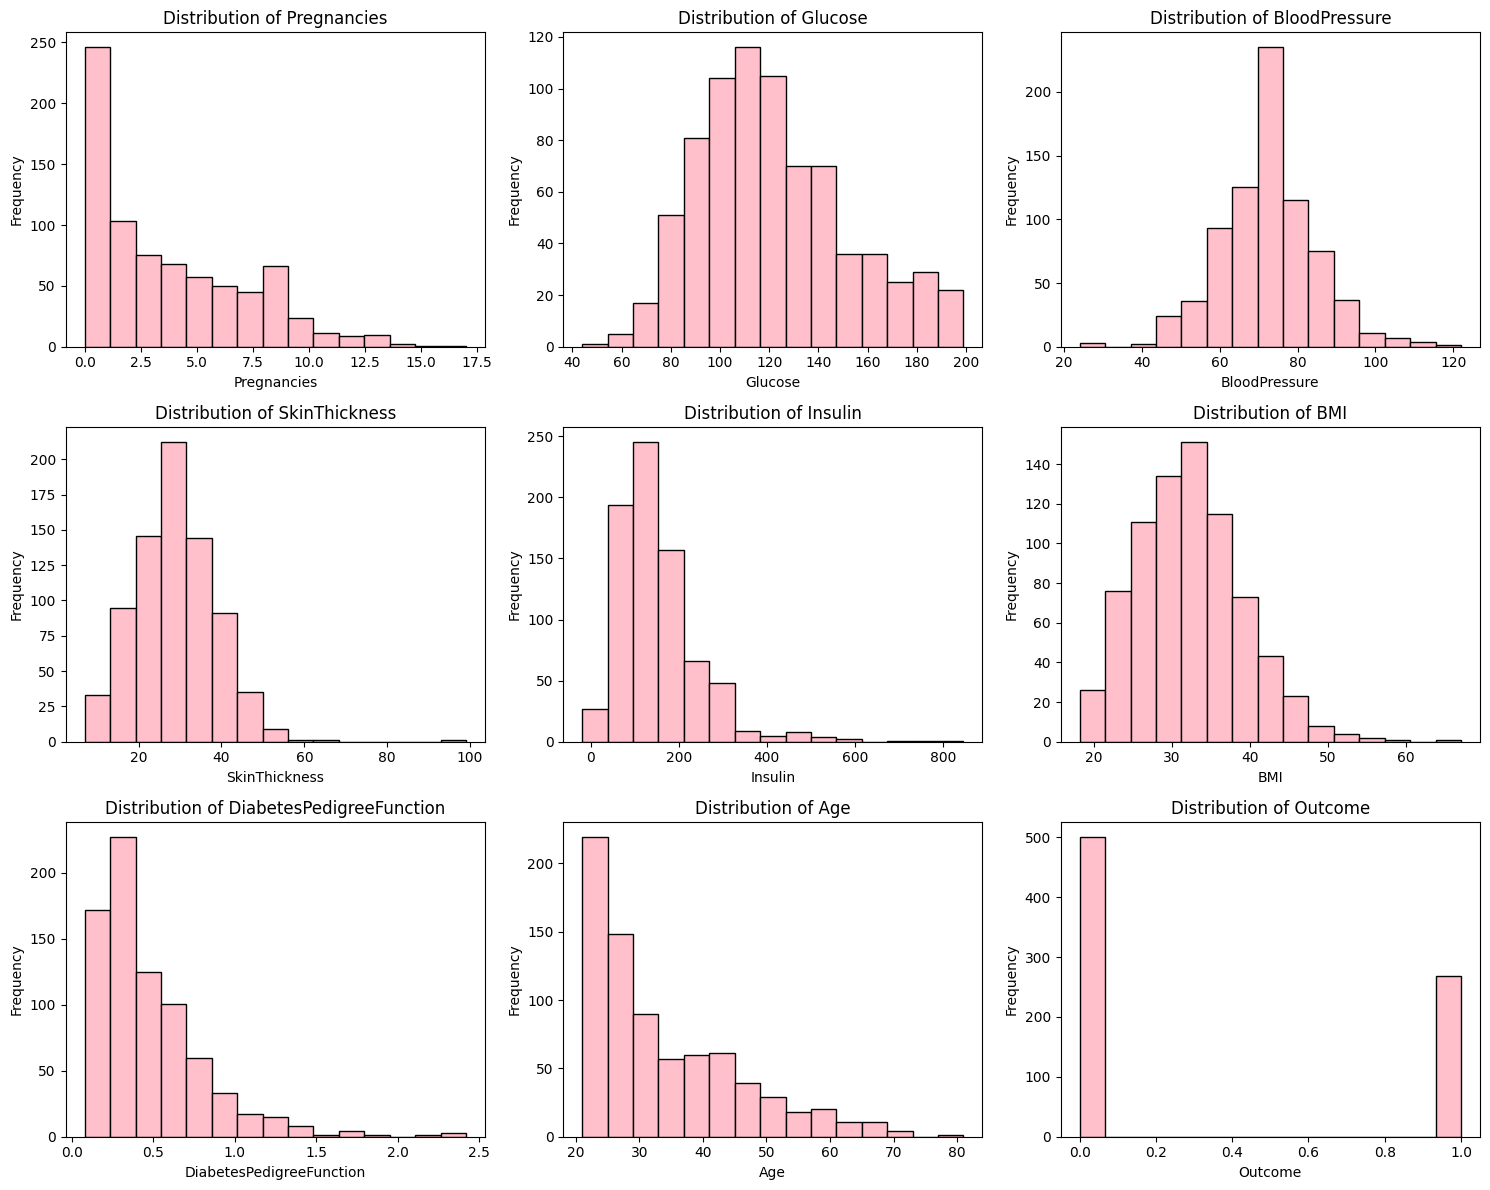

In [14]:
columns_to_visualize = df_mice_imputed.columns

plt.figure(figsize=(15, 12))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 3, i)
    plt.hist(df_mice_imputed[column].dropna(), bins=15, color='pink', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

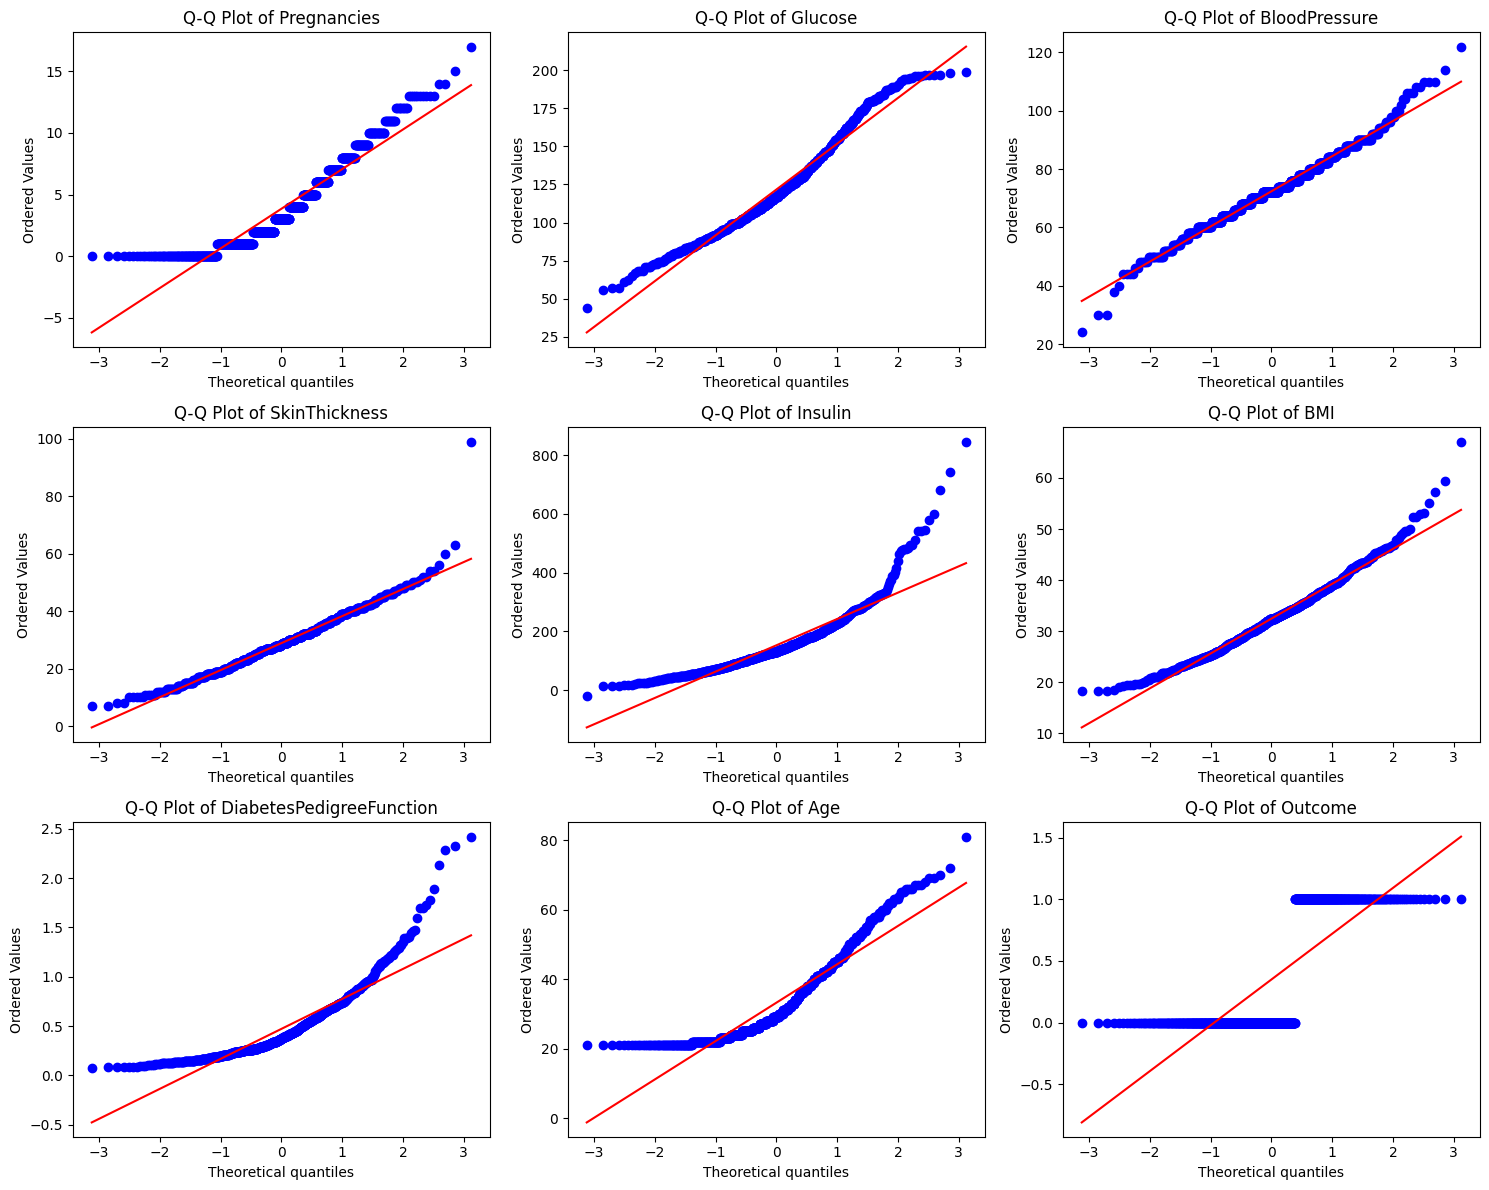

In [15]:
# Plotting Q-Q plots for each variable to visualize normality
plt.figure(figsize=(15, 12))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 3, i)
    stats.probplot(df_mice_imputed[column].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')

plt.tight_layout()
plt.show()

In [16]:
# Creating a copy of the DataFrame to apply transformations
df_transformed = df_mice_imputed.copy()

# Log transformation for strongly right-skewed variables
df_transformed['Pregnancies'] = np.log1p(df_transformed['Pregnancies'])  # log1p is log(x+1)
df_transformed['Insulin'] = np.log1p(df_transformed['Insulin'])
df_transformed['DiabetesPedigreeFunction'] = np.log1p(df_transformed['DiabetesPedigreeFunction'])
df_transformed['Age'] = np.log1p(df_transformed['Age'])

# Square root transformation for moderately skewed variables
df_transformed['Glucose'] = np.sqrt(df_transformed['Glucose'])
df_transformed['BloodPressure'] = np.sqrt(df_transformed['BloodPressure'])
df_transformed['BMI'] = np.sqrt(df_transformed['BMI'])

# Displaying the first few rows to check the transformations
df_transformed.head()

C:\Users\danda\AppData\Roaming\Python\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.945910,12.165525,8.485281,35.000000,5.393761,5.796551,0.486738,3.931826,1
1,0.693147,9.219544,8.124038,29.000000,4.267554,5.157519,0.300845,3.465736,0
2,2.197225,13.527749,8.000000,21.518492,5.594842,4.827007,0.514021,3.496508,1
3,0.693147,9.433981,8.124038,23.000000,4.553877,5.300943,0.154436,3.091042,0
4,0.000000,11.704700,6.324555,35.000000,5.129899,6.565059,1.190279,3.526361,1


In [17]:
df_transformed.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     1
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
# Check for zeros or extreme values in Insulin before transformation
original_insulin_zeros = df_mice_imputed['Insulin'] == 0
original_insulin_extremes = df_mice_imputed['Insulin'].describe()

# Checking the transformed column to identify the row with NaN
transformed_insulin_nan_row = df_transformed['Insulin'].isna()
df_mice_imputed.loc[transformed_insulin_nan_row]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
62,5.0,44.0,62.0,21.02003,-19.231586,25.0,0.587,36.0,0


In [19]:
df_transformed['Insulin'] = df_transformed['Insulin'].apply(lambda x: x if x >= 0 else np.nan)
df_transformed['Insulin'].fillna(df_transformed['Insulin'].median(), inplace=True)

C:\Users\danda\AppData\Local\Temp\ipykernel_33080\3153634301.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_transformed['Insulin'].fillna(df_transformed['Insulin'].median(), inplace=True)


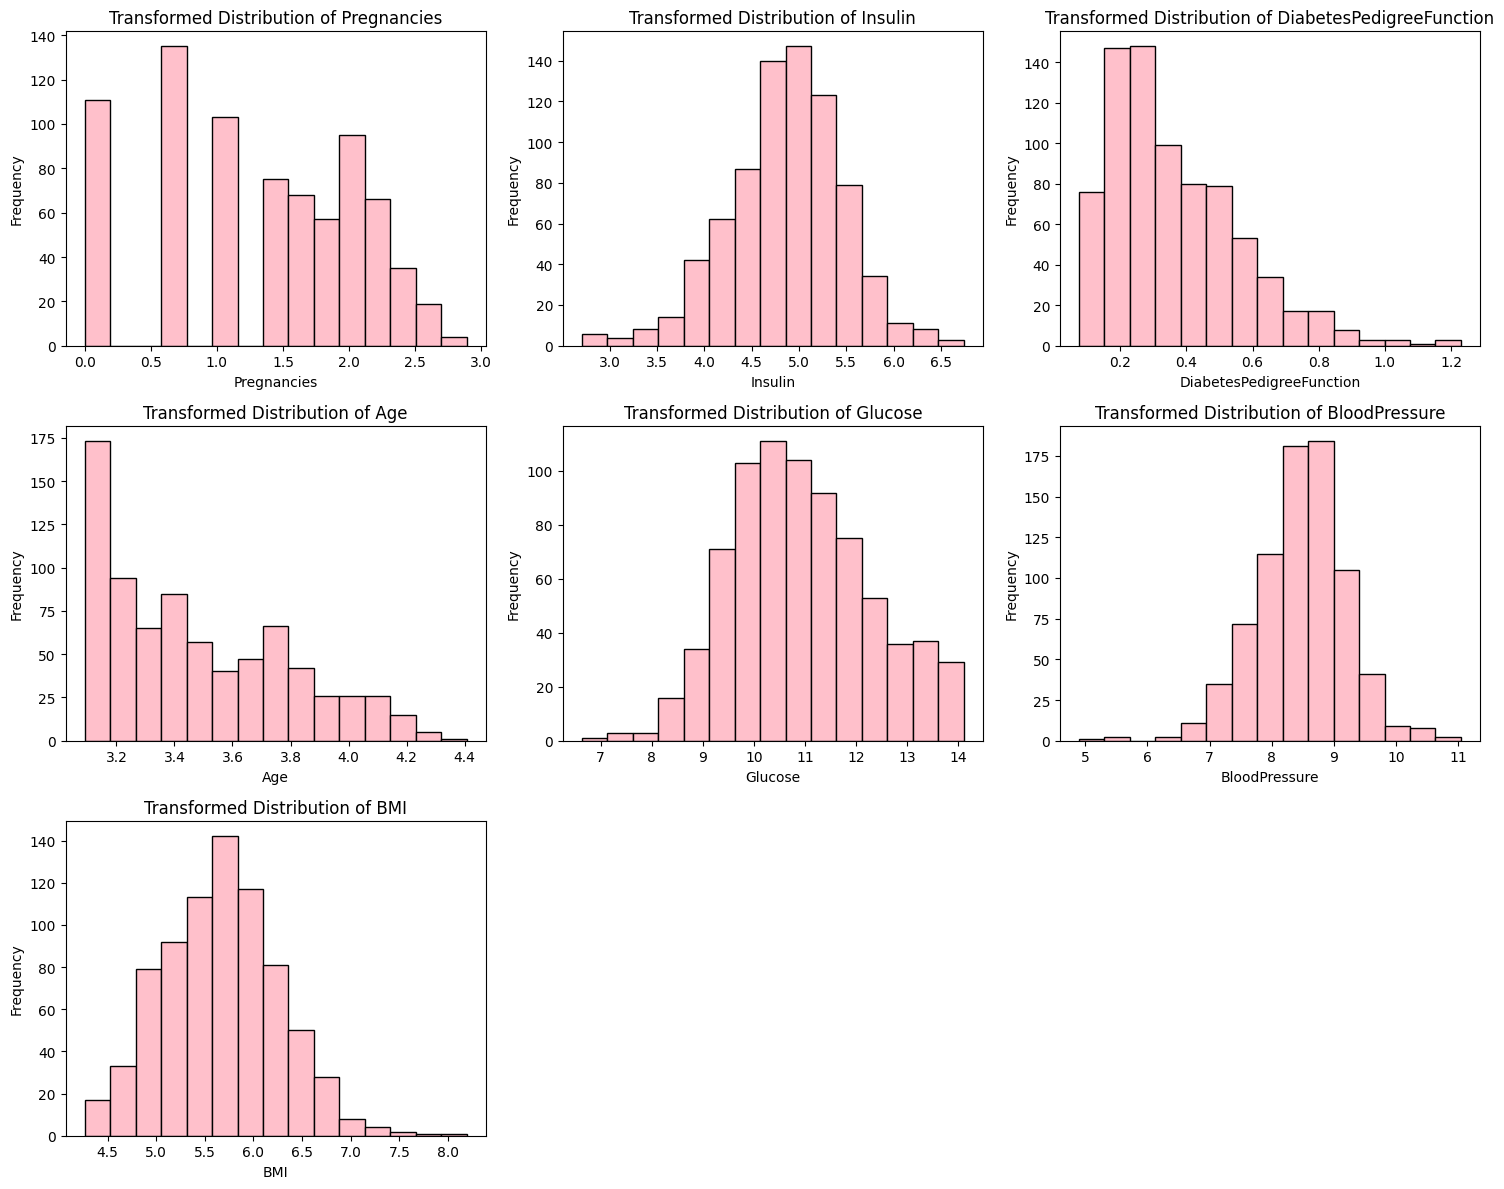

In [20]:
transformed_columns = ['Pregnancies', 'Insulin', 'DiabetesPedigreeFunction', 'Age', 'Glucose', 'BloodPressure', 'BMI']

plt.figure(figsize=(15, 12))
for i, column in enumerate(transformed_columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(df_transformed[column].dropna(), bins=15, edgecolor='black', color='pink')
    plt.title(f'Transformed Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

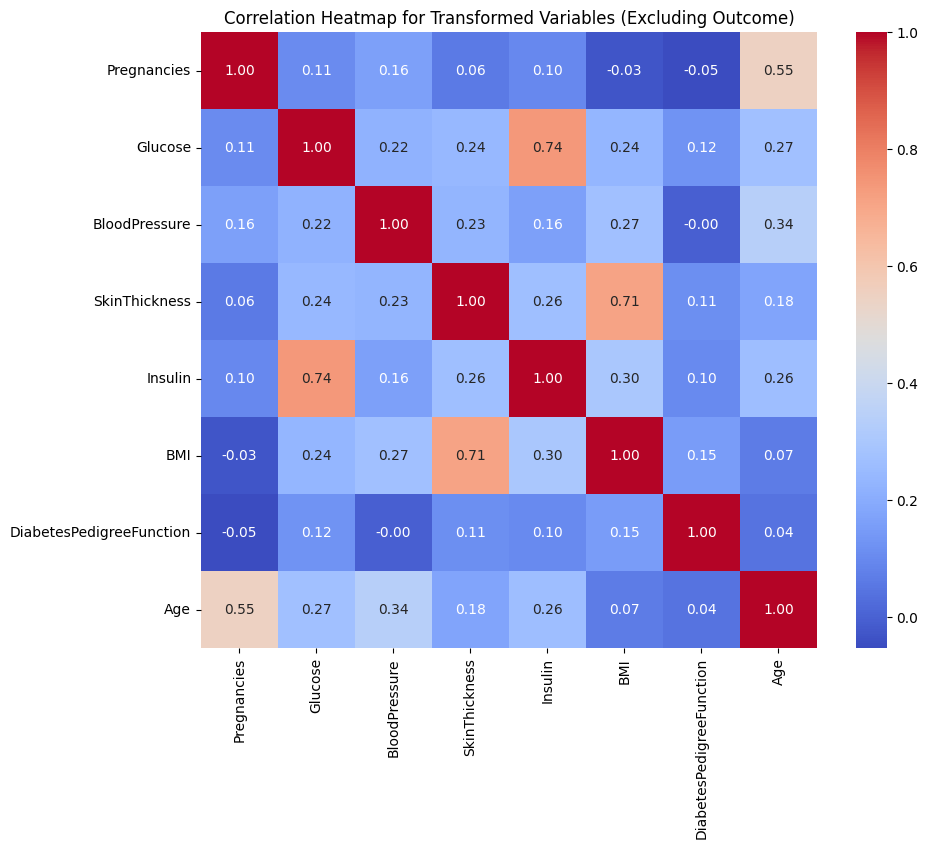

In [21]:
# Computing the correlation matrix for all variables excluding 'Outcome'
correlation_matrix = df_transformed.drop(columns=['Outcome']).corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True, fmt=".2f")
plt.title("Correlation Heatmap for Transformed Variables (Excluding Outcome)")
plt.show()

In [22]:
# Calculating VIF for each feature excluding the 'Outcome' column
X = df_transformed.drop(columns=['Outcome'])  # Independent variables only
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Feature,VIF
0,Pregnancies,5.347992
1,Glucose,148.261514
2,BloodPressure,153.548566
3,SkinThickness,17.864032
4,Insulin,150.352813
5,BMI,151.686808
6,DiabetesPedigreeFunction,4.581827
7,Age,160.389702


In [23]:
# Standardize each pair of features before applying PCA
df_transformed[['Glucose', 'Insulin']] = (df_transformed[['Glucose', 'Insulin']] - df_transformed[['Glucose', 'Insulin']].mean()) / df_transformed[['Glucose', 'Insulin']].std()
df_transformed[['BMI', 'SkinThickness']] = (df_transformed[['BMI', 'SkinThickness']] - df_transformed[['BMI', 'SkinThickness']].mean()) / df_transformed[['BMI', 'SkinThickness']].std()

# Applying PCA on Glucose and Insulin
pca_glucose_insulin = PCA(n_components=1)
glucose_insulin_component = pca_glucose_insulin.fit_transform(df_transformed[['Glucose', 'Insulin']])
df_transformed['PCA_Glucose_Insulin'] = glucose_insulin_component

# Applying PCA on BMI and SkinThickness
pca_bmi_skinthickness = PCA(n_components=1)
bmi_skinthickness_component = pca_bmi_skinthickness.fit_transform(df_transformed[['BMI', 'SkinThickness']])
df_transformed['PCA_BMI_SkinThickness'] = bmi_skinthickness_component

# Dropping original columns to avoid redundancy
df_pca_separate = df_transformed.drop(columns=['Glucose', 'Insulin', 'BMI', 'SkinThickness'])

# Displaying the first few rows of the new DataFrame
df_pca_separate.head()


,Pregnancies,BloodPressure,DiabetesPedigreeFunction,Age,Outcome,PCA_Glucose_Insulin,PCA_BMI_SkinThickness
0,1.945910,8.485281,0.486738,3.931826,1,1.253208,0.607229
1,0.693147,8.124038,0.300845,3.465736,0,-1.584769,-0.595318
2,2.197225,8.000000,0.514021,3.496508,1,2.193155,-1.542478
3,0.693147,8.124038,0.154436,3.091042,0,-1.140187,-0.871089
4,0.000000,6.324555,1.190279,3.526361,1,0.707136,1.517483


In [24]:
# Splitting the dataset into training and test sets
X = df_pca_separate.drop(columns=['Outcome'])
y = df_pca_separate['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Logistic Regression model with balanced class weights
model = LogisticRegression(class_weight='balanced', random_state=42)

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6948051948051948
Confusion Matrix:
 [[67 32]
 [15 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.68      0.74        99
           1       0.56      0.73      0.63        55

    accuracy                           0.69       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.69      0.70       154



In [25]:
# Initialize the Random Forest model with class weights
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest - Accuracy: 0.7792207792207793
Confusion Matrix:
 [[79 20]
 [14 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82        99
           1       0.67      0.75      0.71        55

    accuracy                           0.78       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.79      0.78      0.78       154



In [26]:
from xgboost import XGBClassifier

# Calculate the ratio for scale_pos_weight
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# Initialize the XGBoost model with scale_pos_weight
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost - Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost - Accuracy: 0.7532467532467533
Confusion Matrix:
 [[73 26]
 [12 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.74      0.79        99
           1       0.62      0.78      0.69        55

    accuracy                           0.75       154
   macro avg       0.74      0.76      0.74       154
weighted avg       0.77      0.75      0.76       154



In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']  # To keep the balanced class weights
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up Grid Search with cross-validation
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best F1-Score for Random Forest:", grid_search_rf.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best F1-Score for Random Forest: 0.6528769158222174


In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'scale_pos_weight': [y_train.value_counts()[0] / y_train.value_counts()[1]],  # For handling class imbalance
}

# Initialize the XGBoost model
xgb = XGBClassifier(random_state=42, eval_metric='logloss')

# Set up Random Search with cross-validation
random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb, n_iter=20, cv=5, scoring='f1', n_jobs=-1, random_state=42, verbose=1)
random_search_xgb.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters for XGBoost:", random_search_xgb.best_params_)
print("Best F1-Score for XGBoost:", random_search_xgb.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for XGBoost: {'subsample': 0.8, 'scale_pos_weight': np.float64(1.8826291079812207), 'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.01}
Best F1-Score for XGBoost: 0.6620494958457257


In [29]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the best models with their respective best parameters
best_rf_model = RandomForestClassifier(
    n_estimators=100, max_depth=10, min_samples_split=10, class_weight='balanced', random_state=42
)

best_xgb_model = XGBClassifier(
    subsample=0.8, scale_pos_weight=1.8826291079812207, n_estimators=50, max_depth=7,
    learning_rate=0.01, random_state=42, eval_metric='logloss'
)

# Train and evaluate the Random Forest model on the test set
best_rf_model.fit(X_train, y_train)
y_pred_rf = best_rf_model.predict(X_test)

# Metrics for Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_confusion = confusion_matrix(y_test, y_pred_rf)
rf_classification_report = classification_report(y_test, y_pred_rf)

# Train and evaluate the XGBoost model on the test set
best_xgb_model.fit(X_train, y_train)
y_pred_xgb = best_xgb_model.predict(X_test)

# Metrics for XGBoost
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_confusion = confusion_matrix(y_test, y_pred_xgb)
xgb_classification_report = classification_report(y_test, y_pred_xgb)

# Displaying the evaluation results
print("Random Forest - Test Data Evaluation")
print("Accuracy:", rf_accuracy)
print("Confusion Matrix:\n", rf_confusion)
print("Classification Report:\n", rf_classification_report)

print("\nXGBoost - Test Data Evaluation")
print("Accuracy:", xgb_accuracy)
print("Confusion Matrix:\n", xgb_confusion)
print("Classification Report:\n", xgb_classification_report)

Random Forest - Test Data Evaluation
Accuracy: 0.7792207792207793
Confusion Matrix:
 [[76 23]
 [11 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.77      0.82        99
           1       0.66      0.80      0.72        55

    accuracy                           0.78       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.80      0.78      0.78       154


XGBoost - Test Data Evaluation
Accuracy: 0.7532467532467533
Confusion Matrix:
 [[73 26]
 [12 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.74      0.79        99
           1       0.62      0.78      0.69        55

    accuracy                           0.75       154
   macro avg       0.74      0.76      0.74       154
weighted avg       0.77      0.75      0.76       154



In [30]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the best models with their tuned parameters
best_rf_model = RandomForestClassifier(
    n_estimators=100, max_depth=10, min_samples_split=10, class_weight='balanced', random_state=42
)

best_xgb_model = XGBClassifier(
    subsample=0.8, scale_pos_weight=1.8826291079812207, n_estimators=50, max_depth=7,
    learning_rate=0.01, random_state=42, eval_metric='logloss'
)

# Create a Voting Classifier with both models
voting_ensemble = VotingClassifier(
    estimators=[('random_forest', best_rf_model), ('xgboost', best_xgb_model)],
    voting='soft'  # Soft voting for probability averaging
)

# Train the ensemble model
voting_ensemble.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ensemble = voting_ensemble.predict(X_test)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
ensemble_confusion = confusion_matrix(y_test, y_pred_ensemble)
ensemble_classification_report = classification_report(y_test, y_pred_ensemble)

print("Voting Ensemble - Test Data Evaluation")
print("Accuracy:", ensemble_accuracy)
print("Confusion Matrix:\n", ensemble_confusion)
print("Classification Report:\n", ensemble_classification_report)

Voting Ensemble - Test Data Evaluation
Accuracy: 0.7662337662337663
Confusion Matrix:
 [[74 25]
 [11 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.75      0.80        99
           1       0.64      0.80      0.71        55

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.76       154
weighted avg       0.79      0.77      0.77       154



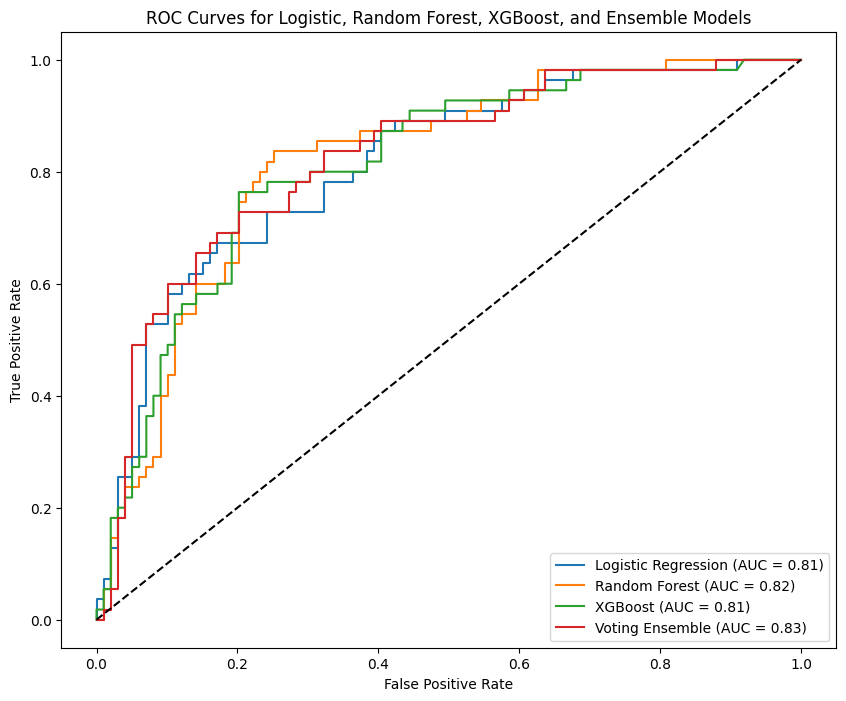

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize all models with their best parameters
logistic_model = LogisticRegression(class_weight='balanced', random_state=42)
best_rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, class_weight='balanced', random_state=42)
best_xgb_model = XGBClassifier(subsample=0.8, scale_pos_weight=1.8826291079812207, n_estimators=50, max_depth=7, learning_rate=0.01, random_state=42, eval_metric='logloss')
voting_ensemble = VotingClassifier(estimators=[('logistic', logistic_model), ('random_forest', best_rf_model), ('xgboost', best_xgb_model)], voting='soft')

# Train models on the training data
logistic_model.fit(X_train, y_train)
best_rf_model.fit(X_train, y_train)
best_xgb_model.fit(X_train, y_train)
voting_ensemble.fit(X_train, y_train)

# Predict probabilities for ROC-AUC curve
y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]
y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]
y_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]
y_prob_ensemble = voting_ensemble.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for each model
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_logistic)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
fpr_ens, tpr_ens, _ = roc_curve(y_test, y_prob_ensemble)

auc_log = auc(fpr_log, tpr_log)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)
auc_ens = auc(fpr_ens, tpr_ens)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot(fpr_ens, tpr_ens, label=f'Voting Ensemble (AUC = {auc_ens:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic, Random Forest, XGBoost, and Ensemble Models')
plt.legend(loc='lower right')
plt.show()

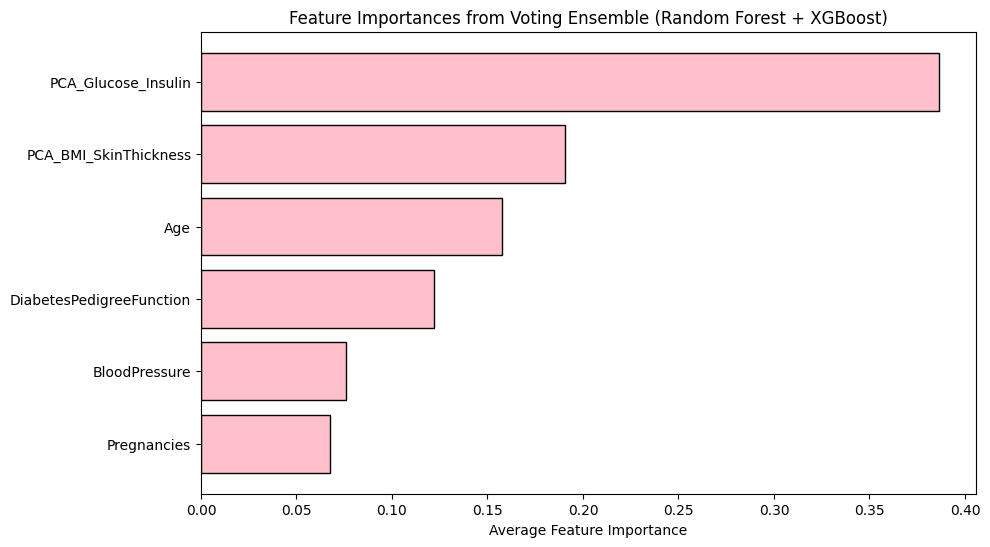

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from Random Forest and XGBoost
rf_importances = best_rf_model.feature_importances_
xgb_importances = best_xgb_model.feature_importances_

# Average the importances (for simplicity, giving equal weight to both models)
avg_importances = (rf_importances + xgb_importances) / 2
feature_names = X_train.columns

# Create a DataFrame for easy visualization
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': avg_importances
})

# Sort features by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], edgecolor='black', color='pink')
plt.xlabel('Average Feature Importance')
plt.title('Feature Importances from Voting Ensemble (Random Forest + XGBoost)')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()